In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six



In [2]:
datapath = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/fit2/tables/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
         "nonlinearmodelq0ctime_fit_table.csv","nonlinearmodel_fit_table_fit3.csv"]
model_hash = {}
k = -1
for model in models:
    k += 1
    model_hash[model] = string.ascii_uppercase[k]

df = pd.DataFrame.from_dict(model_hash, orient='index')
df.to_csv('../postfit_derivatives/model_hash.csv', header=False)

In [3]:
rois = []
for model in models:
    df = pd.read_csv(datapath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))

#get inferred
theta = df.columns[2:] 
ntheta = len(theta)



In [4]:
dfwaic_sorted = pd.read_csv("../postfit_derivatives/roimodel_waicsorted_topmodel_modelname.csv")

In [5]:
theta_ = ["R0","Rlast"]
label_ = {}
label_["R0"] = "R0"
label_["Rlast"] = "R current"

dfreport = pd.DataFrame(columns=['Region', 'Model','median '+label_[theta_[0]],'CI lower','CI upper','median '+label_[theta_[1]],'CI lower','CI upper','Mean WAIC'])
k = -1
for roi in rois:
#     try:
    k += 1
    model = "fulllinearmodel_fit_table.csv" #dfwaic_sorted.loc[dfwaic_sorted.roi==roi,'model'].values[0]
    df = pd.read_csv(datapath + model)
    theta = theta_[0]
    measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
    measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
    measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
    waic = dfwaic_sorted.loc[dfwaic_sorted.roi==roi,'waic'].values[0]
    x = [roi,model.split('_fit_table.csv')[0],np.round(measure1,4),np.round(measure2,4),np.round(measure3,4)]
    theta = theta_[1]
    measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
    measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
    measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
    waic = dfwaic_sorted.loc[dfwaic_sorted.roi==roi,'waic'].values[0]
    x += [np.round(measure1,4),np.round(measure2,4),np.round(measure3,4),np.round(waic,2)]
    dfreport.loc[k] = x
#     except:
#         print(model)
#         print(df.columns)


print(dfreport)



          Region            Model  median R0  CI lower  CI upper  \
0          Benin  fulllinearmodel     3.9210    1.2309   14.2177   
1    Philippines  fulllinearmodel     8.1191    2.3694   32.9272   
2        Bahamas  fulllinearmodel     3.9298    1.2360   14.3376   
3        Albania  fulllinearmodel     4.9566    1.8474   19.4881   
4           Iraq  fulllinearmodel     2.6453    1.2720   10.3216   
..           ...              ...        ...       ...       ...   
165        US_RI  fulllinearmodel     4.4476    1.6745   12.7735   
166       Gambia  fulllinearmodel     5.0432    1.3243   18.8032   
167      Morocco  fulllinearmodel     6.8236    2.4982   19.2799   
168         Peru  fulllinearmodel     4.4531    1.6784   15.7611   
169      Belarus  fulllinearmodel     2.8127    1.3458   11.3203   

     median R current  CI lower  CI upper  Mean WAIC  
0              2.6778    0.4147   10.9925     130.58  
1              4.6509    1.9379   11.2546     870.97  
2              2.3

4.5487
2.7291499999999997


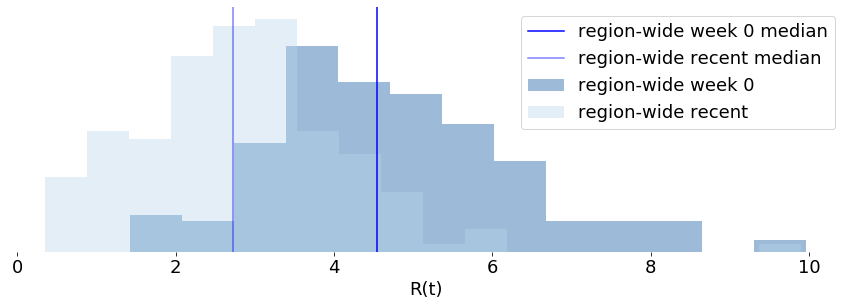

In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
c_ = sns.color_palette('Blues')
f,ax = plt.subplots(1,1,figsize=(15,5))
sns.distplot(dfreport['median R0'],color=c_[5],ax=ax, kde=False, norm_hist=True, label='region-wide week 0')
mu = np.median(dfreport['median R0'].values)
print(mu)
ax.axvline(mu,color='b',label='region-wide week 0 median')
sns.distplot(dfreport['median R current'],color=c_[1],ax=ax, kde=False, norm_hist=True,label='region-wide recent')
mu = np.median(dfreport['median R current'].values)
print(mu)
ax.axvline(mu,color='b',alpha=0.5,label='region-wide recent median')
# ax.set_xlim((0,1))
plt.legend()
simpleaxis(ax)
# ax.set_title(label,fontsize=fs)
# ax.axvline(mu)
# ax.text(mu,20,str(np.round(mu,3)))
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')
plt.subplots_adjust(hspace=0.5,bottom=0.1)
ax.set_xlabel('R(t)')
plt.subplots_adjust(hspace=0.5,bottom=0.2)

plt.savefig('../postfit_derivatives/Rpastpresent.png')